# Prathmesh Deshmukh
 
 TASK 4-Classification using decision tree

### Decision Trees

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
%matplotlib inline

### preparing the data for fitting into the model

In [2]:
iris_set = datasets.load_iris()
iris_data = pd.DataFrame(iris_set.data, columns=iris_set.feature_names)
iris_data["species"] = iris_set.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Knowing missing values

In [3]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

### Visualising the sepal and petal dimensions

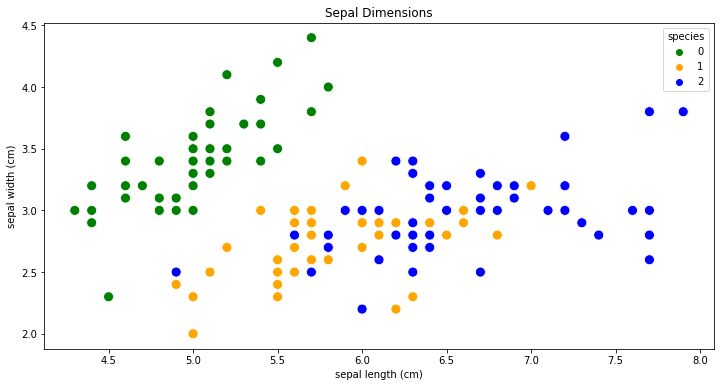

In [4]:
plt.figure(figsize=(12, 6))
plt.title('Sepal Dimensions')

sns.scatterplot(x=iris_data["sepal length (cm)"], 
                y=iris_data["sepal width (cm)"], 
                hue=iris_data["species"],palette = ["green","orange","blue"],
                s=100);

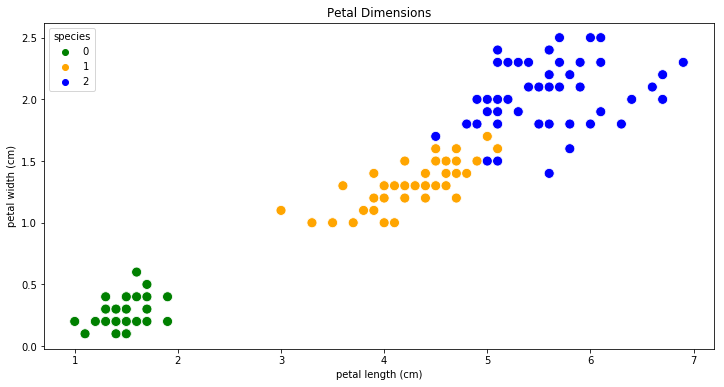

In [5]:
plt.figure(figsize=(12, 6))
plt.title('Petal Dimensions')

sns.scatterplot(x=iris_data["petal length (cm)"], 
                y=iris_data["petal width (cm)"], 
                hue=iris_data["species"],palette = ["green","orange","blue"],
                s=100);

Here species "0" has small petal length and petal width while opposite holds true for species "2". It can be observed that there is linear relationship between petal length and petal width for all species

### Analysing correlation between feature and Target

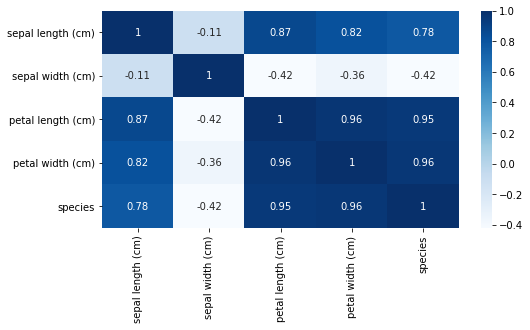

In [6]:
plt.figure(figsize=(8,4))
sns.heatmap(iris_data.corr(), annot=True, cmap='Blues');

he plot insightes that Petal width and length are highly correlated, while the sepal length and width are not correlated.

### Now let us define the Decision Tree Algorithm

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris_data, test_size = 0.2)


In [9]:
train_x = train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
train_y = train.species
test_x = test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
test_y = test.species

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtree = DecisionTreeClassifier()
dtree.fit(train_x,train_y)
predictions = dtree.predict(test_x)


In [11]:
##checking accuracy for test data
metrics.accuracy_score(predictions, test_y)

0.9666666666666667

Test accuracy is 96%, hence we can now fit the model for entire data and test for the new data

In [13]:
X = iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
Y = iris_data.species

In [14]:
dtree1 = DecisionTreeClassifier()
dtree1.fit(X,Y)
print("Decision Tree Classifier is created")

Decision Tree Classifier is created


### Let us visualize the Decision Tree to understand it better.



In [0]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

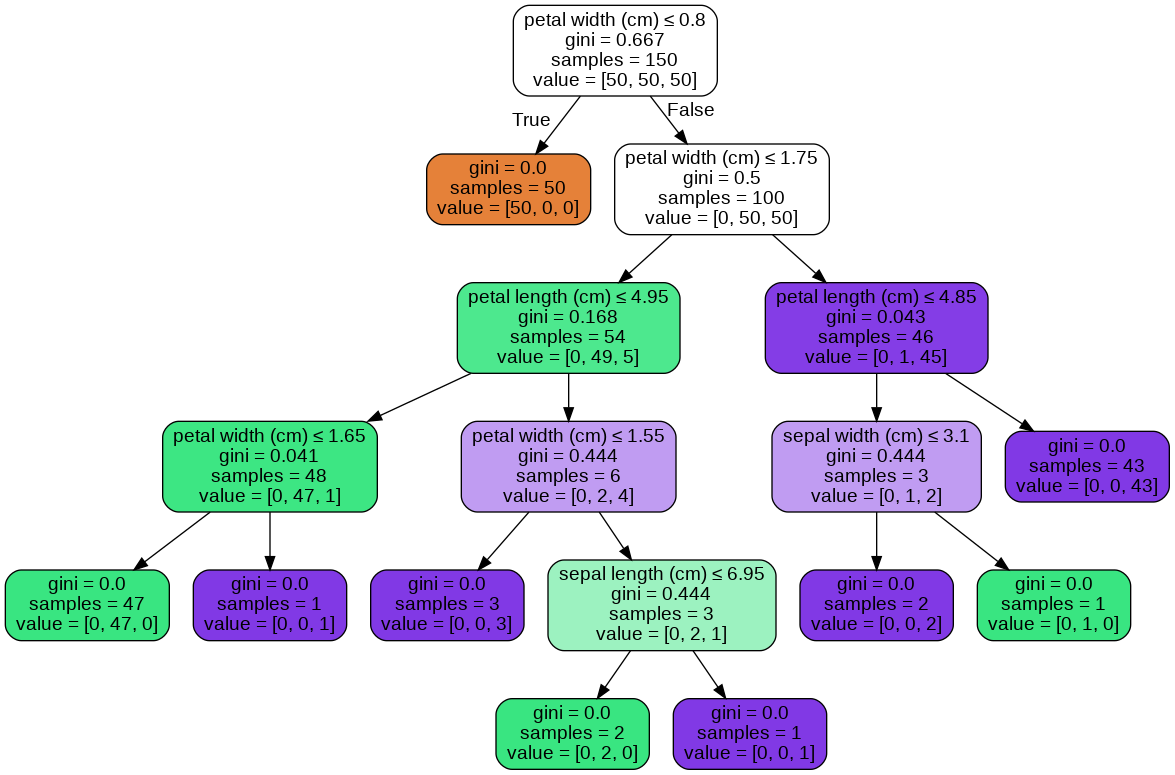

In [0]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())